In [11]:
#JSR import statements
import pandas as pd

In [36]:
#reading the file
dfMB = pd.read_csv('Metabolic Syndrome.csv')

# print(dfMB.head())
print(len(dfMB))

###dropping missing values 
dfMB = dfMB.dropna()
#resetting index after dropping it
dfMB = dfMB.reset_index()
print(len(dfMB)) #2009
print(dfMB.head())


### remove duplicate rows
duplicate_rows = dfMB[dfMB.duplicated()]
# print(len(duplicate_rows))  # no duplicate rows found

###converting catgorical values such as Sex, Marital, Race using one hot encoding
dfMB_Sex_Encoded = pd.get_dummies(dfMB['Sex'])
print((dfMB_Sex_Encoded))
dfMB_Marital_Encoded = pd.get_dummies(dfMB['Marital'])
print(dfMB_Marital_Encoded)
dfMB_Race_Encoded = pd.get_dummies(dfMB['Race'])
print(dfMB_Race_Encoded)


##combining all other df in one
dfMBs = [dfMB, dfMB_Sex_Encoded, dfMB_Race_Encoded, dfMB_Marital_Encoded]
total_dfMB = pd.concat(dfMBs, axis=1) ## 1 means concatenationg columns
print(total_dfMB.head())

#dropping sex, race, marital
dropped_categories = ['Sex', 'Race', 'Marital']
total_dfMB.drop(dropped_categories, axis=1, inplace=True)   # 1 represents columns, inplace = true deletes it in the dataframe
total_dfMB.head()

#combining male and female into new column
# dfMB['Sex'] = 0
# dfMB.head()

# for i in range(len(dfMB)):
#     if(dfMB_Sex_Encoded['Female'].get(i)==0 and dfMB_Sex_Encoded['Male']==1):
#         dfMB['Sex'] = 1
#     else:
#         dfMB['Sex'] = 0

##dimension reduction using PCA





2401
2009
   index   seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  \
0      0  62161   22    Male   Single  8200.0  White       81.0  23.3   
1      1  62164   44  Female  Married  4500.0  White       80.1  23.2   
2      2  62169   21    Male   Single   800.0  Asian       69.6  20.1   
3      3  62172   43  Female   Single  2000.0  Black      120.4  33.3   
4      5  62178   80    Male  Widowed   300.0  White      112.5  28.5   

   Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0            0     3.88       4.9            92   41             84   
1            0     8.55       4.5            82   28             56   
2            0     5.07       5.4           107   43             78   
3            0     5.22       5.0           104   73            141   
4            0     9.79       4.8           105   47            100   

   MetabolicSyndrome  
0                  0  
1                  0  
2                  0  
3                  0  
4        

,index,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,...,Black,Hispanic,MexAmerican,Other,White,Divorced,Married,Separated,Single,Widowed
0,0,62161,22,8200.0,81.0,23.3,0,3.88,4.9,92,...,0,0,0,0,1,0,0,0,1,0
1,1,62164,44,4500.0,80.1,23.2,0,8.55,4.5,82,...,0,0,0,0,1,0,1,0,0,0
2,2,62169,21,800.0,69.6,20.1,0,5.07,5.4,107,...,0,0,0,0,0,0,0,0,1,0
3,3,62172,43,2000.0,120.4,33.3,0,5.22,5.0,104,...,1,0,0,0,0,0,0,0,1,0
4,5,62178,80,300.0,112.5,28.5,0,9.79,4.8,105,...,0,0,0,0,1,0,0,0,0,1


[0.13591415 0.12148519 0.09615077 0.07029366 0.06516524]


Text(0, 0.5, 'proportion of the total variance')

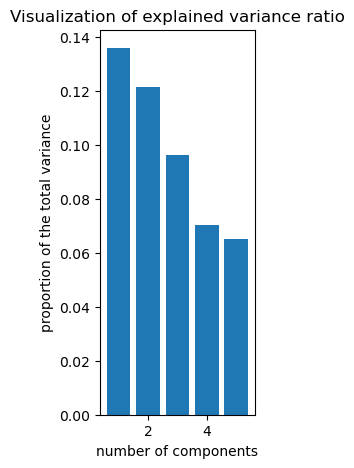

In [54]:
####PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt


#numerical values
x = total_dfMB[["Age", "Income", "BMI", "Income", "UricAcid", "BloodGlucose", "HDL", "Triglycerides", "Female", "Male",
          "Divorced", "Married", "Separated", "Single", "Widowed", "Asian", "Black", "Hispanic", "MexAmerican", "MetabolicSyndrome","Other", "White"]]

#standardizing
sc = StandardScaler()
x_scaled = sc.fit_transform(x)  #fitting the new df
#size of n components
n_components = 5 #number of principal components
pca = PCA(n_components=n_components) #creating instance of pca
X_pca = pca.fit_transform(x_scaled) #performing pca on the scaled dataframe
EVR = pca.explained_variance_ratio_ # getting variance ratio 
print(pca.explained_variance_ratio_)

#visualization of explained variance ratio
plt.figure(figsize=(2,5))

#defining range
plt.bar(range(1, 
              len(EVR)+1), EVR, align='center',
)
plt.title("Visualization of explained variance ratio")
plt.xlabel("number of components")
plt.ylabel("proportion of the total variance")

